# Lab 1

## Authentication with Spotify API

In [45]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id='INSERT ID',
                                                          client_secret='INSERT ID'))

## Get data from API

In [46]:
playlist_id = '50WijGE2KSlSS9Sn4uIZjB'

In [47]:
from random import randint
from time import sleep

def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        print('some results loaded')
        sleep(randint(1,3))
    return tracks

In [48]:
all_tracks = get_playlist_tracks(playlist_id)
len(all_tracks)

some results loaded


171

In [49]:
playlist = sp.user_playlist_tracks("spotify", playlist_id)

In [50]:
all_tracks[0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [51]:
playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [52]:
def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify", playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [53]:
all_tracks = get_playlist_tracks(playlist_id)

In [54]:
all_tracks[0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [55]:
all_tracks[0]['track']['name']

'2step (feat. Lil Baby)'

In [56]:
# There can be more than one artists per track. So 2nd indice must be iterate through
all_tracks[0]['track']['artists'][0]['name']

'Ed Sheeran'

In [57]:
all_tracks[0]['track']['popularity']

80

In [58]:
len(all_tracks[0]['track']['artists'])

2

In [59]:
len(all_tracks)

171

In [60]:
tracks = []
artists = []
popularity = []
for track in all_tracks:
    tracks.append(track['track']['name'])
    popularity.append(track['track']['popularity'])
    artists_per_track = ''
    for artist in track['track']['artists']:
        if artists_per_track == '':
            artists_per_track = artist['name']
        else:
            artists_per_track = artists_per_track + ', ' + artist['name']
    artists.append(artists_per_track)        

In [61]:
print(len(tracks))
print(len(artists))
print(len(popularity))

171
171
171


## Creating the Dataframe

### Create dataframe with tracks from our playlist

In [62]:
import pandas as pd
df = pd.DataFrame(tracks, columns = ['track_name'])

In [63]:
df['artist_name'] = artists
df['popularity'] = popularity

In [64]:
df

,track_name,artist_name,popularity
0,2step (feat. Lil Baby),"Ed Sheeran, Lil Baby",80
1,As It Was,Harry Styles,100
2,Thousand Miles,The Kid LAROI,86
3,Dancing Feet (feat. DNCE),"Kygo, DNCE",80
4,Crazy What Love Can Do,"David Guetta, Becky Hill, Ella Henderson",82
...,...,...,...
166,Mosaik,"kid kapri, Florida Juicy",37
167,Sterne unterm Dach,badmómzjay,1
168,u.,niteboi,73
169,love nwantiti (feat. ElGrande Toto) - North Af...,"CKay, ElGrandeToto",71


In [65]:
df['track_id'] = [(all_tracks[i]['track']['uri']) for i in range(len(all_tracks))]

In [66]:
df = df[['artist_name', 'track_id', 'track_name', 'popularity']]

In [67]:
df

,artist_name,track_id,track_name,popularity
0,"Ed Sheeran, Lil Baby",spotify:track:2UN0lp72LAusrXi8LLVomt,2step (feat. Lil Baby),80
1,Harry Styles,spotify:track:4LRPiXqCikLlN15c3yImP7,As It Was,100
2,The Kid LAROI,spotify:track:1r8ZCjfrQxoy2wVaBUbpwg,Thousand Miles,86
3,"Kygo, DNCE",spotify:track:4RAR8g8fZNB106ezUurnE0,Dancing Feet (feat. DNCE),80
4,"David Guetta, Becky Hill, Ella Henderson",spotify:track:1WCEAGGRD066z2Q89ObXTq,Crazy What Love Can Do,82
...,...,...,...,...
166,"kid kapri, Florida Juicy",spotify:track:3x9fMzoAPNxEFVrP6kU1f7,Mosaik,37
167,badmómzjay,spotify:track:0Gj6aUE3y9Pcjm9Lr3IcH9,Sterne unterm Dach,1
168,niteboi,spotify:track:0J7oHYxjF6Oln61wy0kP2i,u.,73
169,"CKay, ElGrandeToto",spotify:track:1EYeZGTMCjV7uVey5fNWXM,love nwantiti (feat. ElGrande Toto) - North Af...,71


In [68]:
# deactivated because it's quicker to retrieve those from the csv
features = [sp.audio_features(i) for i in df['track_id']]

In [69]:
df_features = pd.DataFrame(features[0])
# df_features= pd.read_csv('features.csv')

In [70]:
df_features.to_csv('features.csv')

In [71]:
for i in range(len(features)):
    if i == 0: continue
    df_features = df_features.append(pd.DataFrame(features[i]),ignore_index=True)

C:\Users\User\AppData\Local\Temp\ipykernel_12460\3460961755.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(pd.DataFrame(features[i]),ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_12460\3460961755.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(pd.DataFrame(features[i]),ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_12460\3460961755.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(pd.DataFrame(features[i]),ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_12460\3460961755.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

In [72]:
df_features.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [73]:
features

[[{'danceability': 0.693,
   'energy': 0.643,
   'key': 4,
   'loudness': -5.867,
   'mode': 0,
   'speechiness': 0.0828,
   'acousticness': 0.138,
   'instrumentalness': 0,
   'liveness': 0.108,
   'valence': 0.477,
   'tempo': 95.055,
   'type': 'audio_features',
   'id': '2UN0lp72LAusrXi8LLVomt',
   'uri': 'spotify:track:2UN0lp72LAusrXi8LLVomt',
   'track_href': 'https://api.spotify.com/v1/tracks/2UN0lp72LAusrXi8LLVomt',
   'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2UN0lp72LAusrXi8LLVomt',
   'duration_ms': 163450,
   'time_signature': 4}],
 [{'danceability': 0.52,
   'energy': 0.731,
   'key': 6,
   'loudness': -5.338,
   'mode': 0,
   'speechiness': 0.0557,
   'acousticness': 0.342,
   'instrumentalness': 0.00101,
   'liveness': 0.311,
   'valence': 0.662,
   'tempo': 173.93,
   'type': 'audio_features',
   'id': '4LRPiXqCikLlN15c3yImP7',
   'uri': 'spotify:track:4LRPiXqCikLlN15c3yImP7',
   'track_href': 'https://api.spotify.com/v1/tracks/4LRPiXqCikLlN15c3yImP7',


In [74]:
# we want to merge it with the huge csv file from kaggle, therefore we
# order the columns and remove the cols we don't have in the csv file

df_features = df_features[['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']]

In [75]:
df = pd.concat([df, df_features], axis=1)

### Add data from kaggle

In [76]:
df['popularity']

0       80
1      100
2       86
3       80
4       82
      ... 
166     37
167      1
168     73
169     71
170     32
Name: popularity, Length: 171, dtype: int64

In [77]:
df_kaggle = pd.read_csv('spotifyfeatures.csv')
df_kaggle

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.6410,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.9280,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130658,Calum Scott,0cvfSKcm9VeduwyYPrxtLx,Come Back Home,0.006780,0.601,190539,0.801,0.000,11,0.0991,-5.174,1,0.0323,131.049,4,0.2890,57
130659,Saint Claire,43MP9F7UzvfilSrw2SqZGJ,Enough for You,0.918000,0.387,194583,0.249,0.000,9,0.1030,-13.233,1,0.0437,94.039,4,0.3460,60
130660,Mike Stud,4TWlUuFk81NGUNKwndyS5Q,Do It,0.330000,0.717,139191,0.532,0.000,8,0.0997,-8.351,0,0.2060,156.977,4,0.5460,47
130661,D Savage,5iGBXzOoRo4sBTy8wdzMyK,No Smoke,0.007900,0.772,180013,0.510,0.000,4,0.1310,-9.670,0,0.1200,120.049,4,0.0755,50


In [78]:
df = pd.concat([df, df_kaggle], axis=0)

In [79]:
df.isnull().sum()

artist_name         0
track_id            0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

# Lab 2 | Unsupervised learning intro

## Clustering

In [80]:
X = df._get_numeric_data()
X.columns
y = pd.Series(df['track_name'])


In [81]:
# The scale of "proline" is much higher than the scale of many other variables!
# K-Means is a distance based algorithm: we need to scale / normalize:

from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler().fit_transform(X)

# Now, all features will have the same weight.
pd.DataFrame(X_prep,columns=X.columns).head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,2.820301,-0.591386,0.586179,-0.399174,0.283259,-0.621231,-0.342196,-0.518063,0.627151,-1.244380,-0.235047,-0.809932,0.235156,0.143938
1,3.832244,-0.001003,-0.324145,-0.367871,0.621455,-0.618427,0.212929,0.692584,0.708018,-1.244380,-0.453073,1.805294,0.235156,0.858138
2,3.123884,-0.742455,-1.081872,-0.388352,0.337063,-0.621231,0.490492,-0.634953,0.811969,0.803613,-0.283319,-1.290372,0.235156,-0.913852
3,2.820301,-0.142810,0.886112,0.021281,0.875102,-0.621231,-1.452446,1.175650,0.786287,0.803613,0.048145,-0.448724,0.235156,0.321523
4,2.921495,-0.909152,0.102076,-0.347942,0.552279,-0.621231,-0.342196,-0.219874,0.949550,-1.244380,-0.539962,0.112385,0.235156,0.093751


In [82]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(X_prep)

KMeans(n_clusters=3, random_state=1234)

In [83]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    61244
1    27084
2    42506
dtype: int64

In [84]:
clusters

array([2, 2, 0, ..., 2, 2, 0])

In [85]:
df['cluster'] = clusters

In [86]:
df

,artist_name,track_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,cluster
0,"Ed Sheeran, Lil Baby",spotify:track:2UN0lp72LAusrXi8LLVomt,2step (feat. Lil Baby),80,0.13800,0.693,163450,0.643,0.00000,4,0.1080,-5.867,0,0.0828,95.055,4,0.4770,2
1,Harry Styles,spotify:track:4LRPiXqCikLlN15c3yImP7,As It Was,100,0.34200,0.520,167303,0.731,0.00101,6,0.3110,-5.338,0,0.0557,173.930,4,0.6620,2
2,The Kid LAROI,spotify:track:1r8ZCjfrQxoy2wVaBUbpwg,Thousand Miles,86,0.08580,0.376,164782,0.657,0.00000,7,0.0884,-4.658,1,0.0768,80.565,4,0.2030,0
3,"Kygo, DNCE",spotify:track:4RAR8g8fZNB106ezUurnE0,Dancing Feet (feat. DNCE),80,0.29300,0.750,215203,0.797,0.00000,0,0.3920,-4.826,1,0.1180,105.949,4,0.5230,0
4,"David Guetta, Becky Hill, Ella Henderson",spotify:track:1WCEAGGRD066z2Q89ObXTq,Crazy What Love Can Do,82,0.02820,0.601,169756,0.713,0.00000,4,0.1580,-3.758,0,0.0449,122.872,4,0.4640,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130658,Calum Scott,0cvfSKcm9VeduwyYPrxtLx,Come Back Home,57,0.00678,0.601,190539,0.801,0.00000,11,0.0991,-5.174,1,0.0323,131.049,4,0.2890,0
130659,Saint Claire,43MP9F7UzvfilSrw2SqZGJ,Enough for You,60,0.91800,0.387,194583,0.249,0.00000,9,0.1030,-13.233,1,0.0437,94.039,4,0.3460,1
130660,Mike Stud,4TWlUuFk81NGUNKwndyS5Q,Do It,47,0.33000,0.717,139191,0.532,0.00000,8,0.0997,-8.351,0,0.2060,156.977,4,0.5460,2
130661,D Savage,5iGBXzOoRo4sBTy8wdzMyK,No Smoke,50,0.00790,0.772,180013,0.510,0.00000,4,0.1310,-9.670,0,0.1200,120.049,4,0.0755,2


In [87]:
import matplotlib.pyplot as plt

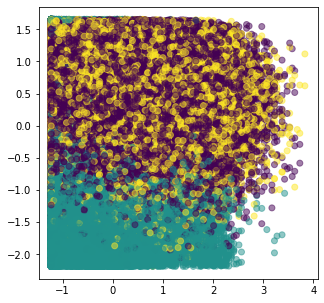

In [88]:
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 4], c=clusters,alpha=0.5)
plt.show()

In [89]:
%%time
kmeans = KMeans(n_clusters=3,
                init="random",
                n_init=100,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=10,
                tol=0,
                random_state=1234)
kmeans.fit(X_prep)
print(kmeans.inertia_)

1405846.4269299984
CPU times: total: 41.6 s
Wall time: 5.83 s


### Elbow method showing the optimal k

In [90]:
# deactivated because of loading time

# import numpy as np
# K = range(2, 20)
# inertia = []

# for k in K:
#     kmeans = KMeans(n_clusters=k,
#                     random_state=1234)
#     kmeans.fit(X_prep)
#     inertia.append(kmeans.inertia_)

# import matplotlib.pyplot as plt
# %matplotlib inline

# plt.figure(figsize=(16,8))
# plt.plot(K, inertia, 'bx-')
# plt.xlabel('k')
# plt.ylabel('inertia')
# plt.xticks(np.arange(min(K), max(K)+1, 1.0))
# plt.title('Elbow Method showing the optimal k')

### Silhouette Score

In [91]:
# deactivated because of loading time
# from sklearn.metrics import silhouette_score
# K = range(2, 20)
# silhouette = []

# for k in K:
#     kmeans = KMeans(n_clusters=k,
#                     random_state=1234)
#     kmeans.fit(X_prep)
#     silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


# plt.figure(figsize=(16,8))
# plt.plot(K, silhouette, 'bx-')
# plt.xlabel('k')
# plt.ylabel('silhouette score')
# plt.xticks(np.arange(min(K), max(K)+1, 1.0))
# plt.title('Slhouette score showing the optimal k')

## Get Top 100

In [92]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from IPython.display import display

In [93]:
# 2. find url and store it in a variable
url = "https://www.offiziellecharts.de/charts/single/for-date-1651096800000"

In [94]:
# 3. download html with a get request
response = requests.get(url)
response.status_code # 200 status code means OK!

200

In [95]:
# 4.1. parse html (create the 'soup')
soup = BeautifulSoup(response.content, "html.parser")

In [96]:
# 4.2. check that the html code looks like it should
soup

<!DOCTYPE html>

<html class="no-js" lang="de-de" prefix="og: http://ogp.me/ns#" xml:lang="de-de" xmlns="http://www.w3.org/1999/xhtml">
<meta content="Hier gibt’s die Offiziellen Deutschen Charts in ihrer ganzen Vielfalt. Denn: Hier zählt die Musik." name="description"/>
<head>
<script type="text/javascript">  (function(){   function blockCookies(disableCookies, disableLocal, disableSession){   if(disableCookies == 1){   if(!document.__defineGetter__){   Object.defineProperty(document, 'cookie',{   get: function(){ return ''; },   set: function(){ return true;}   });   }else{   var oldSetter = document.__lookupSetter__('cookie');   if(oldSetter) {   Object.defineProperty(document, 'cookie', {   get: function(){ return ''; },   set: function(v){   if(v.match(/reDimCookieHint\=/)) {   oldSetter.call(document, v);   }   return true;   }   });   }   }   var cookies = document.cookie.split(';');   for (var i = 0; i < cookies.length; i++) {   var cookie = cookies[i];   var pos = cookie.index

In [97]:
# 5. retrieve/extract the desired info
soup.select("body > main > div.container > div > div.col-md-8 > div:nth-child(5) > div > table")

[<table class="table chart-table">
 <tr class="drill-down-link">
 <td class="ch-pos">
 <a class="drill-down" href="/titel-details-2265703"></a>
 <span class="this-week">1</span>
 </td>
 <td class="ch-trend">
 <span class="last-week">
                                         3                                    </span>
 <i class="trend-up"></i> </td>
 <td class="ch-cover">
 <span class="cover-img" style="background: url('/templates/gfktemplate/images/cover/2265703_s.jpg') top left no-repeat;"></span>
 </td>
 <td class="ch-info">
 <div class="wrap">
 <span class="info-artist">Harry Styles</span>
 <span class="info-title">As It Was</span>
 <span class="info-label">Columbia</span>
 <span class="play-media">
 <span class="plus-data">
                                                     In Charts: <b>3                                                        W</b>
 </span>
 <span class="plus-data">
                                                     Peak: <b>1</b>
 </span>
 <!-- -->
 <span cl

In [98]:
soup.select("table") # all the info about all chart songs

[<table class="table chart-table">
 <tr class="drill-down-link">
 <td class="ch-pos">
 <a class="drill-down" href="/titel-details-2265703"></a>
 <span class="this-week">1</span>
 </td>
 <td class="ch-trend">
 <span class="last-week">
                                         3                                    </span>
 <i class="trend-up"></i> </td>
 <td class="ch-cover">
 <span class="cover-img" style="background: url('/templates/gfktemplate/images/cover/2265703_s.jpg') top left no-repeat;"></span>
 </td>
 <td class="ch-info">
 <div class="wrap">
 <span class="info-artist">Harry Styles</span>
 <span class="info-title">As It Was</span>
 <span class="info-label">Columbia</span>
 <span class="play-media">
 <span class="plus-data">
                                                     In Charts: <b>3                                                        W</b>
 </span>
 <span class="plus-data">
                                                     Peak: <b>1</b>
 </span>
 <!-- -->
 <span cl

In [99]:
soup.select("table span") # all elements containing song info

[<span class="this-week">1</span>,
 <span class="last-week">
                                         3                                    </span>,
 <span class="cover-img" style="background: url('/templates/gfktemplate/images/cover/2265703_s.jpg') top left no-repeat;"></span>,
 <span class="info-artist">Harry Styles</span>,
 <span class="info-title">As It Was</span>,
 <span class="info-label">Columbia</span>,
 <span class="play-media">
 <span class="plus-data">
                                                     In Charts: <b>3                                                        W</b>
 </span>
 <span class="plus-data">
                                                     Peak: <b>1</b>
 </span>
 <!-- -->
 <span class="play-video video-more" data-target="https://www.youtube.com/embed/H5v3kku4y6Q"><i class="glyphicon glyphicon-film"></i></span> </span>,
 <span class="plus-data">
                                                     In Charts: <b>3                                     

In [100]:
# we can use .get_text() to extract the content of the tags we selected
# we'll need to do it to each tag with a for loop: here we do it to the first one
soup.select("table span")[3].get_text()

'Harry Styles'

In [101]:
# artist:
# we can access attributes as key-value pairs of dictionaries: using ["key"] to get the value:
soup.select("table span")[3]["class"]

['info-artist']

In [102]:
# title
soup.select("table span")[4].get_text()

'As It Was'

In [103]:
soup.select("table span")[4]["class"]

['info-title']

In [104]:
artist = []
for span in soup.find_all('span', attrs={'class':'info-artist'}):
    artist.append(span.get_text())

In [105]:
track_names = []
for span in soup.find_all('span', attrs={'class':'info-title'}):
    track_names.append(span.get_text())

In [106]:
top100 = pd.DataFrame({"artist":artist,
                       "track_names":track_names})

In [107]:
top100

,artist,track_names
0,Harry Styles,As It Was
1,Jack Harlow,First Class
2,Rammstein,Zick zack
3,Miksu / MacLoud & T-Low,Sehnsucht
4,Glass Animals,Heat Waves
...,...,...
95,Art [DE],Belgisches Viertel
96,Pashanim,Paris Freestyle
97,Gabry Ponte x LUM!X x Prezioso,Thunder
98,atb x Topic x A7S,Your Love (9PM)


## GNOD

In [110]:
def gnod():
    song_name = input('Insert a song: ')
    # song_name = 'About Damn Time'
    song_data = sp.search(f'song:{song_name}')
    song_id = song_data['tracks']['items'][0]['id']
    song_popularity = song_data['tracks']['items'][0]['popularity']
    song_features = pd.DataFrame(sp.audio_features(song_id))
    song_features['popularity'] = song_popularity
    # song_features.columns
    X = song_features._get_numeric_data()
    X_prep = StandardScaler().fit_transform(X)
    song_cluster = kmeans.predict(X_prep)
    if song_name in top100['track_names'].values:
        display(top100['track_names'].sample())
    else:
        display(df[df['cluster']==song_cluster[0]]['track_name'].sample())

song_features.drop(columns =['uri', 'track_href', 'analysis_url', 'type', 'id'], inplace =True)

In [111]:
gnod()

41    Industry Baby
Name: track_names, dtype: object

In [112]:
gnod()

127582    Tell Me
Name: track_name, dtype: object